Faculty of Sciences of Tunis

Amna MEFTAH

Data Science student 

2022-2023

# Customer Churn Prediction of a Telecom company

## Part 2: Model Building (Notebook 2/2)

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [2]:
df=pd.read_csv('C:\Users\PC\Desktop\work\Customer_Churn\data\tel_churn.csv')

In [3]:
df.head(5)

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [6]:
# Creating x and y variable
y=df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [7]:
x=df.drop(['Churn'], axis=1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


### Train Test Split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Decision Tree Classifier

In [9]:
model_dt=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=6, min_samples_leaf=8)

In [10]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [11]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [12]:
model_dt.score(x_test,y_test)

0.7732764747690121

In [13]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1012
           1       0.61      0.55      0.58       395

    accuracy                           0.77      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



<IPython.core.display.Javascript object>

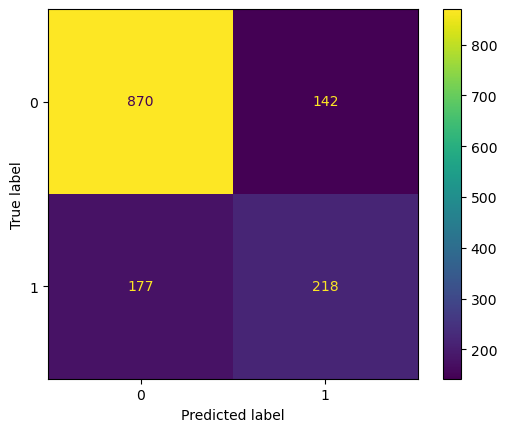

In [14]:
cm1 = confusion_matrix(y_test, y_pred, labels=model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model_dt.classes_)
disp.plot()
plt.show()

As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [15]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [16]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [17]:
model_dt_smote=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)

In [18]:
model_dt_smote.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [19]:
yr_pred=model_dt_smote.predict(xr_test)

0.9460154241645244
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       528
           1       0.95      0.96      0.95       639

    accuracy                           0.95      1167
   macro avg       0.95      0.94      0.95      1167
weighted avg       0.95      0.95      0.95      1167



<IPython.core.display.Javascript object>

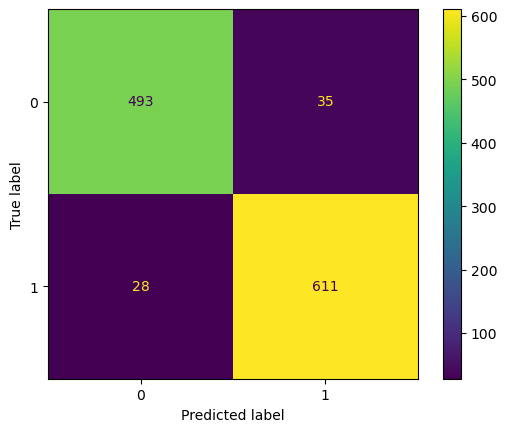

In [20]:
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_pred))
cm = confusion_matrix(yr_test, yr_pred, labels=model_dt_smote.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_dt_smote.classes_)
disp.plot()
plt.show()

Now we can see quite better results, i.e. Accuracy: 94 %, and a very good recall, precision & f1 score for minority class.

Let's try with some other classifier.

### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model_rf=RandomForestClassifier(n_estimators=100, criterion="gini",random_state=100, max_depth=6, min_samples_leaf=8)

In [30]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [31]:
y_pred=model_rf.predict(x_test)

In [44]:
model_rf.score(x_test,y_test)

0.7924662402274343

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1012
           1       0.68      0.48      0.57       395

    accuracy                           0.79      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



<IPython.core.display.Javascript object>

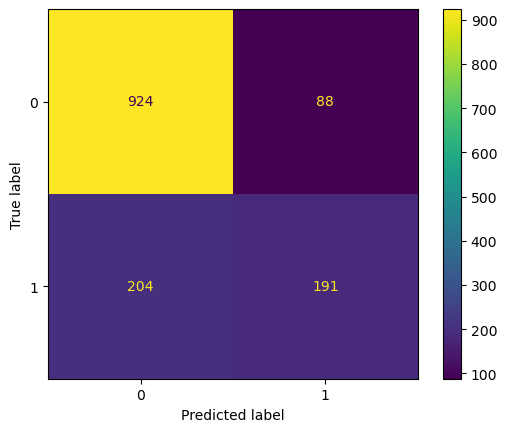

In [47]:
cm = confusion_matrix(y_test, y_pred, labels=model_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
disp.plot()
plt.show()

In [48]:
sm=SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [49]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [50]:
yr_train1.head()

3484    1
1710    0
200     0
183     0
2073    0
Name: Churn, dtype: int64

In [51]:
model_rf_smote=RandomForestClassifier(n_estimators=100,criterion="gini",random_state=100, max_depth=6, min_samples_leaf=8)

In [52]:
model_rf_smote.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [53]:
yr_pred1=model_rf_smote.predict(xr_test1)

In [54]:
model_score_r1=model_rf_smote.score(xr_test1, yr_test1)

In [55]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_pred1, labels=[0,1]))

0.9305912596401028
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       538
           1       0.91      0.97      0.94       629

    accuracy                           0.93      1167
   macro avg       0.94      0.93      0.93      1167
weighted avg       0.93      0.93      0.93      1167



In [56]:
print(metrics.confusion_matrix(yr_test1, yr_pred1))

[[475  63]
 [ 18 611]]


<IPython.core.display.Javascript object>

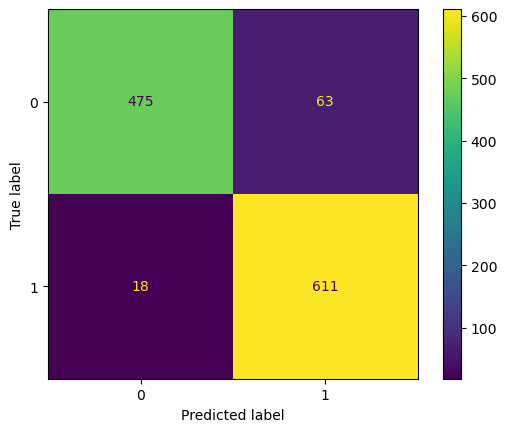

In [57]:
cm = confusion_matrix(yr_test1, yr_pred1, labels=model_rf_smote.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf_smote.classes_)
disp.plot()
plt.show()

With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

### PCA

In [58]:
from sklearn.decomposition import PCA
pca=PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [59]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state =100, max_depth=6, min_samples_leaf=8)

In [60]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [61]:
yr_predict_pca = model.predict(xr_test_pca)

In [62]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [63]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7497857754927164
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       538
           1       0.74      0.84      0.78       629

    accuracy                           0.75      1167
   macro avg       0.75      0.74      0.74      1167
weighted avg       0.75      0.75      0.75      1167



<IPython.core.display.Javascript object>

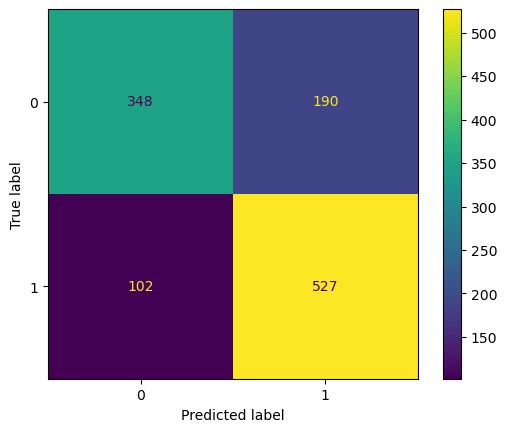

In [64]:
cm = confusion_matrix(yr_test1, yr_predict_pca, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage

## Pickling the model

In [60]:
import pickle

In [61]:
filename = 'model.sav'

In [62]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [64]:
load_model= pickle.load(open(filename,'rb'))

In [65]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [66]:
model_score_r1

0.945531914893617

Our final model i.e.  RF Classifier with SMOTEENN, is now ready and dumped in model.sav, which we will use and prepare API's so that we can access our model from UI.